In [6]:
import hub

In [8]:
ds = hub.load("hub://activeloop/spoken_mnist")

|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/spoken_mnist



|

hub://activeloop/spoken_mnist loaded successfully.



In [10]:
import matplotlib.pyplot as plt

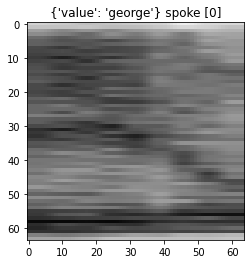

In [13]:
plt.imshow(ds.spectrograms[0].numpy())
plt.title(f"{ds.speakers[0].data()} spoke {ds.labels[0].numpy()}")
plt.show()

In [14]:
ds.speakers[0].data()

{'value': 'george'}

In [15]:
ds.labels[0].numpy()

array([0], dtype=uint32)

In [16]:
ds.audio[2999].numpy()

array([[ -2.],
       [ -9.],
       [ -5.],
       ...,
       [-10.],
       [  2.],
       [ -4.]])

In [19]:
ds.spectrograms[1].numpy()

array([[[193, 193, 193, 255],
        [193, 193, 193, 255],
        [190, 190, 190, 255],
        ...,
        [179, 179, 179, 255],
        [177, 177, 177, 255],
        [177, 177, 177, 255]],

       [[177, 177, 177, 255],
        [177, 177, 177, 255],
        [174, 174, 174, 255],
        ...,
        [169, 169, 169, 255],
        [168, 168, 168, 255],
        [168, 168, 168, 255]],

       [[151, 151, 151, 255],
        [151, 151, 151, 255],
        [149, 149, 149, 255],
        ...,
        [158, 158, 158, 255],
        [156, 156, 156, 255],
        [156, 156, 156, 255]],

       ...,

       [[ 49,  49,  49, 255],
        [ 49,  49,  49, 255],
        [ 49,  49,  49, 255],
        ...,
        [ 91,  91,  91, 255],
        [ 95,  95,  95, 255],
        [ 95,  95,  95, 255]],

       [[113, 113, 113, 255],
        [113, 113, 113, 255],
        [113, 113, 113, 255],
        ...,
        [152, 152, 152, 255],
        [156, 156, 156, 255],
        [156, 156, 156, 255]],

       [[157

In [20]:
for i in range(15):
    print(len(ds.audio[i].numpy()))

2384
4727
5958
3661
4050
4349
4304
4186
5054
4674


C:\Users\ankit\AppData\Roaming\Python\Python310\site-packages\deeplake\core\tensor.py:641: UserWarning: Indexing by integer in a for loop, like `for i in range(len(ds)): ... ds.tensor[i]` can be quite slow. Use `for i, sample in enumerate(ds)` instead.
  warnings.warn(


5581
4465
5332
4347
4260


In [30]:
import os
from pathlib import Path
from shutil import copyfile

def separate(source):
    for filename in os.listdir(source):
        first_split = filename.rsplit("_", 1)[1]
        second_split = first_split.rsplit(".", 1)[0]
        if int(second_split) <= 4:
            copyfile(source + "/" + filename, "testing-spectrograms" + "/" + filename)
        else:
            copyfile(source + "/" + filename, "training-spectrograms" + "/" + filename)

In [31]:
separate('free-spoken-digit-dataset-master/free-spoken-digit-dataset-master/recordings')

In [152]:
train_drec = 'training-spectrograms'
test_drec = 'testing-spectrograms'

In [154]:
import librosa
import numpy as np

w = 240
s = 120
j=0
for filename in os.listdir(train_drec):
    path = train_drec + "/" + filename
    audio_data, sample_rate = librosa.load(path)
    num_frames = (len(audio_data) - w) // s + 1
    frames = np.zeros((num_frames, w))

    split = filename.rsplit(".", 1)[0]
    
    for i in range(num_frames):
        start = i * s
        end = start + w
        frames[i] = audio_data[start : end]
    if j==0:
        A_train = [frames]
        label_name_train = [split]
    else:
        A_train = A_train + [frames]
        label_name_train = label_name_train + [split]
    j = j + 1

h = 0
for filename in os.listdir(test_drec):
    path = test_drec + "/" + filename
    audio_data, sample_rate = librosa.load(path)
    num_frames = (len(audio_data) - w) // s + 1
    frames = np.zeros((num_frames, w))

    split = filename.rsplit(".", 1)[0]
    
    for i in range(num_frames):
        start = i * s
        end = start + w
        frames[i] = audio_data[start : end]
    if h==0:
        A_test = [frames]
        label_name_test = [split]
    else:
        A_test = A_test + [frames]
        label_name_test = label_name_test + [split]
    h = h + 1

In [155]:
label_name_train[0:5],label_name_test[0:5]

(['0_george_10', '0_george_11', '0_george_12', '0_george_13', '0_george_14'],
 ['0_george_0', '0_george_1', '0_george_2', '0_george_3', '0_george_4'])

In [156]:
A_train[0],A_test[0]

(array([[-6.56158337e-03, -1.40369963e-02, -1.71669386e-02, ...,
          2.01026816e-03,  1.54121476e-03,  7.36800604e-04],
        [-3.29799368e-03, -2.37949658e-03,  1.92156294e-05, ...,
         -3.97955999e-04, -9.88557353e-04, -1.10605045e-03],
        [ 3.04409245e-04,  5.55580191e-04,  1.14225282e-03, ...,
          1.10515882e-03,  3.44533531e-04, -5.62029774e-04],
        ...,
        [ 2.62733782e-03,  2.32200464e-03,  2.05859286e-03, ...,
          2.18564738e-03,  2.74077477e-03,  3.56525881e-03],
        [ 2.83672847e-03,  2.58215121e-03,  2.09627766e-03, ...,
         -5.39426459e-03, -5.13174431e-03, -4.72025294e-03],
        [ 4.06961842e-03,  3.95270903e-03,  3.49301053e-03, ...,
          3.33948270e-03,  3.18617909e-03,  2.76323431e-03]]),
 array([[-0.04229989, -0.04891741, -0.0376581 , ...,  0.07926411,
          0.09111017,  0.09099399],
        [ 0.05116938,  0.07361019,  0.09036987, ..., -0.08270819,
         -0.06022616, -0.02047335],
        [ 0.08318868,  0.

In [158]:
mfcc_train=[]
for i in A_train:
    mfcc_features = librosa.feature.mfcc(y=i, sr=22050)
    mfcc_train = mfcc_train + [mfcc_features]
mfcc_test=[]
for i in A_test:
    mfcc_features = librosa.feature.mfcc(y=i, sr=22050)
    mfcc_test = mfcc_test + [mfcc_features]


C:\Users\ankit\AppData\Roaming\Python\Python310\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=240
  warnings.warn(


In [159]:
len(mfcc_train),len(mfcc_test)

(2700, 300)